## Import Library

In [84]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from pandas import datetime 
import math, time 
import itertools
from sklearn import preprocessing 
import datetime 
from operator import itemgetter 
from sklearn.metrics import mean_squared_error
from math import sqrt 
from keras.models import Sequential 
from keras.layers.core import Dense, Dropout, Activation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [85]:
from keras.layers.recurrent import LSTM

In [86]:
from keras.models import load_model

In [87]:
import h5py
import requests 
import os

## Dataset

In [88]:
dataset = pd.read_csv("ADRO.csv")
dataset.head()

,date,open,low,high,volume,close
0,2019-07-29T00:00:00,1220,1220,1255,16327200,1255
1,2019-07-30T00:00:00,1255,1245,1295,20044900,1295
2,2019-07-31T00:00:00,1280,1260,1285,44371900,1270
3,2019-08-01T00:00:00,1270,1215,1275,49309700,1225
4,2019-08-02T00:00:00,1220,1165,1220,65053800,1175


## Normalisasi Data


In [89]:
min_max_scaler = preprocessing.MinMaxScaler()
dataset['open'] = min_max_scaler.fit_transform(dataset.open.values.reshape(-1,1))
dataset['high'] = min_max_scaler.fit_transform(dataset.high.values.reshape(-1,1))
dataset['low'] = min_max_scaler.fit_transform(dataset.low.values.reshape(-1,1))
dataset['volume'] = min_max_scaler.fit_transform(dataset.volume.values.reshape(-1,1))
dataset['close'] = min_max_scaler.fit_transform(dataset['close'].values.reshape(-1,1))

dataset.head()

,date,open,low,high,volume,close
0,2019-07-29T00:00:00,0.734940,0.619289,0.559809,0.008887,0.603960
1,2019-07-30T00:00:00,0.756024,0.644670,0.598086,0.017329,0.643564
2,2019-07-31T00:00:00,0.771084,0.659898,0.588517,0.072570,0.618812
3,2019-08-01T00:00:00,0.765060,0.614213,0.578947,0.083782,0.574257
4,2019-08-02T00:00:00,0.734940,0.563452,0.526316,0.119533,0.524752


In [90]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Splitting Dataset

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [92]:
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test) ,np.array(y_train), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Model LTSM

In [93]:
#Build the model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

## Training

In [94]:
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),shuffle=False)
 
model.summary() 

Epoch 1/200
11/11 [==============================] - 5s 94ms/step - loss: 0.2794 - val_loss: 0.1051
Epoch 2/200
11/11 [==============================] - 0s 11ms/step - loss: 0.0652 - val_loss: 0.0170
Epoch 3/200
11/11 [==============================] - 0s 12ms/step - loss: 0.0224 - val_loss: 0.0054
Epoch 4/200
11/11 [==============================] - 0s 11ms/step - loss: 0.0081 - val_loss: 0.0076
Epoch 5/200
11/11 [==============================] - 0s 12ms/step - loss: 0.0073 - val_loss: 0.0062
Epoch 6/200
11/11 [==============================] - 0s 11ms/step - loss: 0.0069 - val_loss: 0.0050
Epoch 7/200
11/11 [==============================] - 0s 12ms/step - loss: 0.0060 - val_loss: 0.0048
Epoch 8/200
11/11 [==============================] - 0s 11ms/step - loss: 0.0057 - val_loss: 0.0047
Epoch 9/200
11/11 [==============================] - 0s 11ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 10/200
11/11 [==============================] - 0s 12ms/step - loss: 0.0054 - val_loss: 0.0044

In [95]:
predictions = model.predict(X_test)
predictions = min_max_scaler.inverse_transform(predictions)
actual = np.array([y_test])
actual = min_max_scaler.inverse_transform(actual)
actual = np.reshape(actual, (actual.shape[0], actual.shape[1], 1))
print(actual[0])

[[1210.]
 [1230.]
 [1185.]
 [1205.]
 [ 875.]
 [1115.]
 [ 905.]
 [1150.]
 [1160.]
 [1140.]
 [1410.]
 [1120.]
 [1120.]
 [1000.]
 [1285.]
 [1185.]
 [1160.]
 [1030.]
 [1185.]
 [1110.]
 [1270.]
 [1020.]
 [1140.]
 [1470.]
 [1180.]
 [1320.]
 [1095.]
 [1560.]
 [1160.]
 [1165.]
 [1210.]
 [1085.]
 [1335.]
 [1135.]
 [1545.]
 [ 925.]
 [ 775.]
 [1050.]
 [1220.]
 [1470.]
 [1240.]
 [ 890.]
 [1305.]
 [1270.]
 [1155.]
 [1535.]
 [1195.]
 [1205.]
 [1175.]
 [1470.]
 [1040.]
 [1165.]
 [1130.]
 [1035.]
 [1225.]
 [1295.]
 [1260.]
 [1125.]
 [1445.]
 [1475.]
 [1495.]
 [1040.]
 [1105.]
 [1180.]
 [1145.]
 [1335.]
 [1150.]
 [1085.]
 [1200.]
 [1260.]
 [1545.]
 [1180.]
 [ 745.]
 [1005.]
 [1125.]
 [1050.]
 [1555.]
 [ 900.]
 [1230.]
 [1515.]
 [1130.]
 [1480.]
 [1175.]
 [1130.]
 [1495.]
 [ 885.]
 [1280.]
 [1405.]]


## Evaluasi

In [96]:
rms = mean_squared_error(actual[0], predictions, squared=False)
rms

19.403532346947074

## Plotting

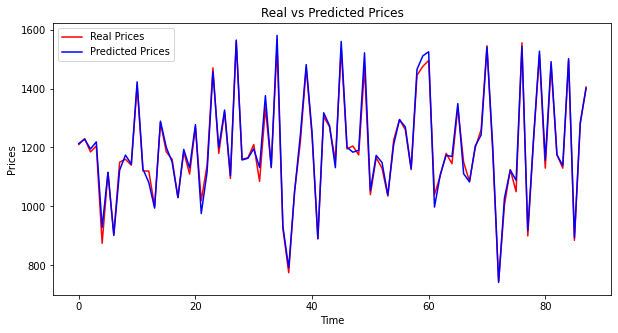

In [97]:
plt.figure(figsize=(10,5))
plt.plot(actual[0],'red',label='Real Prices')
plt.plot(predictions,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=10)